<a href="https://colab.research.google.com/github/Joseph-Maulin/DS-Unit-1-Sprint-2-Statistics/blob/master/LS_DS_123_Introduction_to_Bayesian_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference
[XKCD 1132](https://www.xkcd.com/1132/)

<div>
<img src="https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png" width="300"/>
</div>

#### Bayes vs. Frequentist inference

| Bayes | Frequentist |
|:---|:---|
|uses probabilities for both hypotheses and data|never uses or gives the probability of a hypothesis (no prior or posterior).|
|depends on the prior and likelihood of observed data.|depends on the likelihood P(D / H) for both observed and unobserved data.|
|requires one to know or construct a ‘subjective prior’.|does not require a prior.|
|dominated statistical practice before the 20th century.|dominated statistical practice during the 20th century.|

https://ocw.mit.edu/courses/mathematics/18-05-introduction-to-probability-and-statistics-spring-2014/readings/MIT18_05S14_Reading20.pdf

## Bayes' Theorem
https://www.bayestheorem.net/

<div>
<img src="https://www.bayestheorem.net/images/Bayes-Theorem-Formula-Defined.jpeg" width="500"/>
</div>

**Bayes' theorem:**
$$p(H|D) = \frac{p(D|H) * p(H)}{p(D)}$$

* H is the **hypothesis**  
* D is the observed **data**  
* p(H) is the probability of the hypothesis before we see the data, called the prior probability, or just **prior**.    
* p(D) is the **marginal probability** of the data taking into account all possible hypotheses (aka "total probability of D").  
* p(D|H) is the probability of the data give that the hypothesis is true, called the **conditional probability**.   
*  p(H|D) is what we want to compute, the probability of the hypothesis after we see the data, called the **posterior** probability.

$$posterior = \frac{conditional * prior}{marginal}$$


## Flu Example

Imagine that you are showing some nasty symptoms (headache and sore throat) -- you have a suspicion that you're sick with the flu, but you're not absolutely sure. Is the probability high enough to cancel your big trip?  Consider the following:

* We know people with the flu have a headache and sore throat roughly 90% of the time (this is the **conditional**).  
* We know the probability of having the flu, in general, is only 5% (this is the **prior**).  
* We know that 20% of the population in a given year will have a headache and sore throat at any given time (this is the **marginal** probability).  
<div>
<img src="https://www.bayestheorem.net/images/Bayes-Example-Flu-Ingredients-with-Formula.jpeg" width="500"/>
</div>

* P(A) – What is the probability of you having the flu? This number is the **prior** or .05.  
* P(B|A) – Represented as P(Symptoms | Flu). This number is the **conditional** or .9.  
* P(B) – What is the probability of you having the symptoms? This number is the **marginal** or .2.  

In [0]:
# Define a function for bayes' theorem, assuming you know the conditional, prior, and marginal probabilities.
def bayes_theorem(conditional, prior, marginal):
  return (conditional * prior)/marginal

In [0]:
symp_flu = .90
flu = .05
head_sore = .20

bayes_theorem(symp_flu, flu, head_sore)

0.225

## Cookie Challenge
https://www.greenteapress.com/thinkbayes/thinkbayes.pdf#page20

<div>
<img src="https://food.fnr.sndimg.com/content/dam/images/food/fullset/2009/6/12/2/PASP09_303502_s4x3.jpg.rend.hgtvcom.826.620.suffix/1371589411856.jpeg" width="300"/>
</div>

Suppose there are two bowls of cookies.  
* Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies.  
* Bowl 2 contains 20 vanilla cookies and 20 chocolate cookies.  

What is the probability of randomly drawing a vanilla cookie?

In [0]:
# prior probability of choosing bowl 1 (independent of anything)
p_bowl1, p_bowl2 = .5, .5


In [0]:
# marginal probability of getting a vanilla cookie 
vanilla = 30+20
choc = 10+20
cookies = vanilla + choc

p_van = vanilla / cookies

**Conditional probability**: Given that I pick from bowl 1, what is the probability of randomly drawing a vanilla cookie?  
`p(vanilla|Bowl 1)`

In [0]:
# conditional probability
p_van_bowl1 = 30/40

**Posterior probability**: Now suppose you choose one of the bowls at random and, without looking, select a cookie at random. The cookie is vanilla. What is the probability that it came from Bowl 1?  
`p(Bowl 1|vanilla)`

In [0]:
# posterior probability
bayes_theorem(p_van_bowl1, p_bowl1, p_van)

0.6

## The Monty Hall Challenge
https://math.ucsd.edu/~crypto/Monty/monty.html

<div>
<img src="http://www.sciencemadesimple.co.uk/files/2016/04/The-choices.png" width="400"/>
</div>

In [0]:
# Let's recreate the game with code.
import random

In [0]:
def lets_make_a_deal(select1, select2):
  doors = ['A', 'B', 'C']
  choices = ['KEEP', 'SWITCH']

  car = random.choice(doors)
  #print(f'car is behind door {car}')

  if select1 == car and select2=='KEEP':
    return 1
  elif select1 != car and select2=='SWITCH':
    return 1
  else:
    return 0

In [0]:
# Choose a door (A, B, C,) and a choice (KEEP, SWITCH)
lets_make_a_deal('B', 'SWITCH')

car is behind door C


1

In [0]:
# Play the game 10,000 times. Which strategy is better? (Note: comment out the 'print'!)
sum([lets_make_a_deal(random.choice(['A','B','C']), 'KEEP') for x in range(10000)])

3343

In [0]:
sum([lets_make_a_deal(random.choice(['A','B','C']), 'SWITCH') for x in range(10000)])

6685

Suppose you pick door A. The host opens door B to reveal a goat. Should you switch to door C?  
* prior probability  = 1/3
* marginal probability  = 1/2  
* conditional probability =          (1/2 * 1/3)       +           ( 0 * 1/3)       +           ( 1 * 1/3) = 1/2

In [0]:
# define your prior, marginal, and conditional probabilities
prior = 1/3
marg = 1/2
cond = (1/2 * 1/3) + ( 0 * 1/3) + ( 1 * 1/3)

In [0]:
# P(car is A | choice is A) = (marginal * prior) / conditional
posterior = bayes_theorem(cond, prior, marg)
posterior

0.3333333333333333

In [0]:
# P(car is C | choice is A) = 1-P(car is A | choice is A)
round(1-posterior, 3)

0.667

If we pick a door and then switch after seeing another door opens, the probability of selecting the right door increases from 1/3 to 2/3. It is, based on this information, always in our best interest to switch.

## Bayes' Theorem is derived from 2 Laws

### The Law of Total Probability


By definition, the total probability of all outcomes (events) of some variable (event space) $A$ is 1. That is:

$$P(A) = \sum_n P(A_n) = 1$$

The law of total probability takes this further, considering two variables ($A$ and $B$) and relating their marginal probabilities and their conditional probabilities. 
* marginal probabilities (their likelihoods considered independently, without reference to one another)
* conditional probabilities (their likelihoods considered jointly)  
* A marginal probability is simply notated as e.g. $P(A)$, while a conditional probability is notated $P(A|B)$, which reads "probability of $A$ *given* $B$".

The law of total probability states:

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

In words - the total probability of $A$ is equal to the sum of the conditional probability of $A$ on any given event $B_n$ times the probability of that event $B_n$, and summed over all possible events in $B$.

### The Law of Conditional Probability

What's the probability of something conditioned on something else? To determine this we have to go back to set theory and think about the intersection of sets:

The formula for actual calculation:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

![Visualization of set intersection](https://upload.wikimedia.org/wikipedia/commons/9/99/Venn0001.svg)

Think of the overall rectangle as the whole probability space, $A$ as the left circle, $B$ as the right circle, and their intersection as the red area. Try to visualize the ratio being described in the above formula, and how it is different from just the $P(A)$ (not conditioned on $B$).

We can see how this relates back to the law of total probability - multiply both sides by $P(B)$ and you get $P(A|B)P(B) = P(A \cap B)$ - replaced back into the law of total probability we get $P(A) = \sum_n P(A \cap B_n)$.

This may not seem like an improvement at first, but try to relate it back to the above picture - if you think of sets as physical objects, we're saying that the total probability of $A$ given $B$ is all the little pieces of it intersected with $B$, added together. The conditional probability is then just that again, but divided by the probability of $B$ itself happening in the first place.


### Bayes Theorem

$$P(A|B) = \frac{P(B|A)* P(A)}{P(B)}$$

In words - the probability of $A$ conditioned on $B$ is the probability of $B$ conditioned on $A$, times the probability of $A$ and divided by the probability of $B$. 

### Using Bayes Theorem Iteratively (repeated testing)


There are many ways to apply Bayes' theorem, such as drug tests. You may think that a drug test that is 100% accurate for true positives (detecting somebody who is a user) is pretty good, but what if it also has 1% false positive rate (indicating somebody is a user when they're not)? And furthermore, the rate of drug use in the population at large (and thus our prior belief) is 1/200.

What is the likelihood somebody really is a user if they test positive? Some may guess it's 99% - the difference between the true positives and the false positives. But we have a prior belief of the background/true rate of drug use. Sounds like a job for Bayes' theorem!

![Bayes Theorem Drug Test Example](https://wikimedia.org/api/rest_v1/media/math/render/svg/95c6524a3736c43e4bae139713f3df2392e6eda9)

In other words, the likelihood that somebody is a user given they tested positive on a drug test is only 33.2% - probably much lower than you'd guess. This is why, in practice, it's important to use repeated testing to confirm. If we have the same individual who tested positive the first time take the drug test a second time then the posterior probability from our the first test becomes our new prior during the second application. What is the probability that a person is a drug user after two positive drug tests in a row?

Bayes' theorem has been relevant in court cases where proper consideration of evidence was important. Whether it's a drug test, breathalyzer, pregnancy test, doctor's diagnosis, or neutrino detector, we have to take into account **both** the false positive rate and our prior probability in order to calculate the correct conditional probability.

* P(+|User) = 1 - True Positive Rate

* P(User) = 1/200 Prior probability

* P(+|Non-user) = False Positive rate

You only need the above three numbers in order to calculate bayes rule  

In [0]:
# prior belief
P_user = 1/200

# complement of the prior belief
P_non_user = 1-P_user

# true positive rate
P_pos_given_user = 1

# false positive rate
P_pos_given_non_user = .01



In [0]:
# My first iteration of Bayes Rule (Bayes Theorem)
numerator = P_pos_given_user * P_user

In [0]:
marginal = P_pos_given_user * P_user + P_pos_given_non_user * P_non_user

In [0]:
marginal

0.014950000000000001

In [0]:
posterior = numerator/marginal
posterior
# likely hood that subject is user given that they tested positive

0.33444816053511706

In [0]:
# We have the same person take the drug test again, and they test positive again
# Now what is the likelihood that they are a drug user?
# The posterior probability from the first test becomes our prior for the second iteration.

P_user = posterior
P_non_user = 1 - P_user

numerator = P_pos_given_user * P_user
marginal = P_pos_given_user * P_user + P_pos_given_non_user * P_non_user

posterior = numerator/marginal
posterior

0.9804882831650161

In [0]:
# third test
P_user = posterior
P_non_user = 1 - P_user

numerator = P_pos_given_user * P_user
marginal = P_pos_given_user * P_user + P_pos_given_non_user * P_non_user

posterior = numerator/marginal
posterior


0.9998010395931209

In [0]:
# Fourth test
P_user = posterior
P_non_user = 1 - P_user

numerator = P_pos_given_user * P_user
marginal = P_pos_given_user * P_user + P_pos_given_non_user * P_non_user

posterior = numerator/marginal
posterior

0.99999801000396

In [0]:
# Turn all of that into a function
def prob_drug_use(prior, true_positive, false_positive, num_tests):
  posterior = prior
  for test in range(num_tests):
    P_user = posterior
    P_non_user = 1-P_user

    conditional = true_positive * P_user
    marginal = conditional + false_positive * P_non_user

    posterior = conditional/marginal

  return posterior

In [0]:
# try it out
prob_drug_use(1/200, 1, .01, 3)

0.9998010395931209

## Calculating Bayesian Confidence

In [0]:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html  

#### Example 1. Using random number generator

In [0]:
# import scipy and numpy
from scipy import stats
import numpy as np
# Set Random Seed for Reproducibility
np.random.seed(seed=42)

In [0]:
# define event space
coinflips = np.random.binomial(n=1, p=.5, size=100)

In [0]:
np.mean(coinflips)

0.47

In [0]:
# FREQUENTIST APPROACH
# calculate a 95% confidence interval on either side of this.
conf_freq = stats.t.interval(0.95,
                            len(coinflips),
                            loc=np.mean(coinflips),
                            scale=stats.sem(coinflips))
conf_freq

(0.37048129875673796, 0.569518701243262)

In [0]:
# given a sample mean of .47, we are 95% confident that the pop mean falls between above

In [0]:
# BAYESIAN APPROACH
conf_bayes = stats.bayes_mvs(coinflips, alpha=.95)[0][1]
conf_bayes

(0.37046898750173674, 0.5695310124982632)

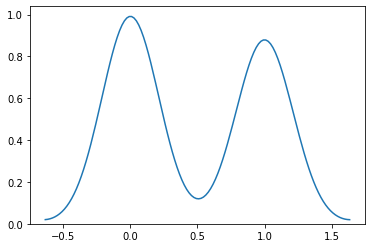

In [0]:
# plot on graph with kernel density estimate
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(coinflips);

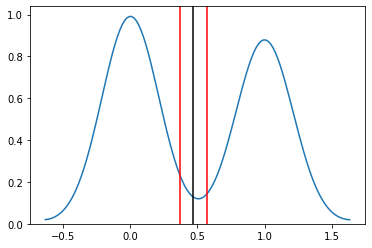

In [0]:
sns.kdeplot(coinflips)

plt.axvline(x=conf_freq[0], color='r')
plt.axvline(x=conf_freq[1], color='r');
plt.axvline(x=np.mean(conf_freq), color='k');


#### Example 2. Using pandas dataframe

In [0]:
# read in the adult workforce dataset
url='https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv'

In [0]:
import pandas as pd


In [0]:
adults = pd.read_csv(url, na_values=" ?")
adults.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
# mean age
adults['age'].mean()

38.58164675532078

In [0]:
# FREQUENTIST APPROACH
# calculate a 95% confidence interval on either side of this.
conf_freq = stats.t.interval(0.95,
                            len(adults['age']),
                            loc=adults['age'].mean(),
                            scale=stats.sem(adults['age']))
conf_freq

(38.433482476875845, 38.72981103376572)

In [0]:
# BAYESIAN APPROACH
conf_bayes = stats.bayes_mvs(adults['age'], alpha=.95)[0][1]
conf_bayes

(38.433490259580736, 38.72980325106083)

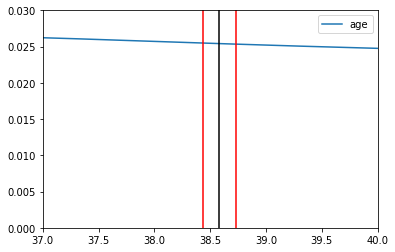

In [0]:
# plot on graph with kernel density estimate
sns.kdeplot(adults['age'])
plt.xlim(37,40)
plt.ylim(0,.03)

plt.axvline(x=conf_freq[0], color='r')
plt.axvline(x=conf_freq[1], color='r');
plt.axvline(x=np.mean(conf_freq), color='k');

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)